In [23]:
# import package
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [24]:
# load data
data=pd.read_csv('C:/Users/icear/Desktop/Kaggle/Spam_Mail_Data\spam_ham_dataset.csv',encoding='latin1')

In [25]:
# column delete
data
del data['Unnamed: 0']
del data['label']

           text
label_num      
0          3672
1          1499


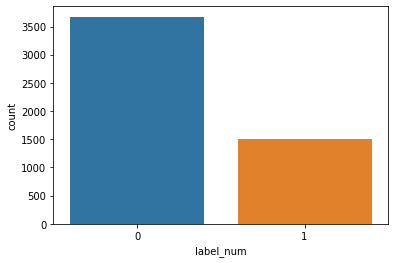

In [26]:
# spam,ham count
sns.countplot('label_num',data=data)
print(data.groupby('label_num').count())

In [27]:
# train,test data split
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

In [28]:
train_text=[]
test_text=[]
for i in train['text']:
    train_text.append(i)
for t in test['text']:
    test_text.append(i)

In [30]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from pprint import pprint

In [31]:
# tokennize
tokens=[]
tokens_new=[]
stop_words = set(stopwords.words('english'))
stop_words.add('Subject:')
for i in range(len(train_text)):
        tokens.extend(word_tokenize(train_text[i]))
for w in tokens:
    if w not in stop_words:
        tokens_new.append(w)

In [32]:
# test frequency
text = nltk.Text(tokens_new, name="NMSC")
print(len(text.tokens))
pprint(text.vocab().most_common(50))

731815
[('-', 68790),
 ('.', 44198),
 ('/', 34502),
 (',', 32338),
 (':', 24345),
 ('ect', 11083),
 ('@', 10273),
 ("'", 6440),
 ('hou', 5806),
 ('enron', 5112),
 (')', 4716),
 ('(', 4440),
 ('?', 4398),
 ('Subject', 4137),
 ('=', 4062),
 (';', 4021),
 ('>', 3899),
 ('2000', 3511),
 ('com', 3076),
 ('!', 2861),
 ('please', 2563),
 ('``', 2500),
 ('3', 2472),
 ('gas', 2407),
 ('_', 2315),
 ('$', 2308),
 ('1', 2303),
 ('subject', 2285),
 ('deal', 2250),
 ('meter', 2071),
 ('00', 2062),
 ('#', 2008),
 ('2', 1944),
 ('cc', 1908),
 ('pm', 1873),
 ('hpl', 1848),
 ('10', 1744),
 ('000', 1704),
 ('2001', 1563),
 ('e', 1558),
 ('thanks', 1510),
 ('daren', 1487),
 ('|', 1475),
 ('01', 1423),
 ('corp', 1394),
 ('%', 1313),
 ('*', 1313),
 ('4', 1307),
 ('&', 1285),
 ('5', 1272)]


In [33]:
selected_words=[i[0] for i in text.vocab().most_common(5000)]

In [34]:
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]
train_x = [term_frequency(d) for d in train_text]
test_x = [term_frequency(d) for d in test_text]

In [35]:
train_y = [score for score in train['label_num']]
test_y  = [score for score in test['label_num']]

In [36]:
import numpy as np

In [37]:
train_x = np.asarray(train_x).astype('float32')
train_y = np.asarray(train_y).astype('float32')

test_x = np.asarray(test_x).astype('float32')
test_y = np.asarray(test_y).astype('float32')

In [38]:
# train shape
train_x.shape

(4137, 5000)

In [39]:
train['text']

2170    Subject: revised : eastrans nomination effecti...
729     Subject: lose while you sleep ! as seen on opr...
2481    Subject: re : mon , 2 feb 2004 03 : 16 : 16 - ...
3164    Subject: re : apache deal 384247 10 / 00\r\nac...
2798    Subject: re : enerfin meter 980439 for 10 / 00...
                              ...                        
909     Subject: new nat gas delivery location\r\npurs...
3031    Subject: frontrea plant , gas\r\nwhen : wednes...
4790    Subject: nom for 2 / 28 and 2 / 29 - hpl deliv...
4317    Subject: indemand payperview movies , sports a...
5095    Subject: @ ect . enron . com email notificatio...
Name: text, Length: 4137, dtype: object

In [43]:
# MLP
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model_1 = models.Sequential()
model_1.add(layers.Dense(32, input_shape=(5000,)))
model_1.add(layers.Dense(32,activation='sigmoid'))
model_1.add(layers.Dense(32,activation='relu'))            
model_1.add(layers.Dense(1, activation='sigmoid'))


model_1.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model1_y_score = model_1.fit(train_x, train_y, epochs=20, batch_size=512)
model1_results = model_1.evaluate(test_x, test_y)

print("\n\nTest Data Result : Loss : {}, Accuracy : {}".format(model1_results[0], model1_results[1]))

Train on 4137 samples
Epoch 1/20
4137/4137 [==============================] - 2s 541us/sample - loss: 0.5263 - binary_accuracy: 0.7293
Epoch 2/20
4137/4137 [==============================] - 0s 34us/sample - loss: 0.3325 - binary_accuracy: 0.8634
Epoch 3/20
4137/4137 [==============================] - 0s 34us/sample - loss: 0.2349 - binary_accuracy: 0.9350
Epoch 4/20
4137/4137 [==============================] - 0s 30us/sample - loss: 0.1799 - binary_accuracy: 0.9473
Epoch 5/20
4137/4137 [==============================] - 0s 28us/sample - loss: 0.1370 - binary_accuracy: 0.9652
Epoch 6/20
4137/4137 [==============================] - 0s 59us/sample - loss: 0.0961 - binary_accuracy: 0.9795
Epoch 7/20
4137/4137 [==============================] - 0s 65us/sample - loss: 0.0845 - binary_accuracy: 0.9824
Epoch 8/20
4137/4137 [==============================] - 0s 41us/sample - loss: 0.0584 - binary_accuracy: 0.9923
Epoch 9/20
4137/4137 [==============================] - 0s 43us/sample - loss: 0.



Test Data Result : Loss : 2.335129773824312, Accuracy : 0.7263056039810181
